<a href="https://colab.research.google.com/github/marcelomonier/CreditCardFraudDetection/blob/main/PROJETO_Marcelo_Monier_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="25%" src="https://github.com/marcelomonier/airbnb_project/blob/main/logo_moment.png?raw=true">



---

# **Detecção de fraudes em cartões de crédito**

<p align="justify">
A fraude financeira está aumentando a cada dia, causando grandes consequências de perdas enfrentadas pelo setor financeiro, organizações corporativas e governo. A fraude de cartão de crédito consulta a condição em que o fraudador utiliza o cartão de crédito para suas necessidades enquanto o dono desse cartão de crédito é enganado.</p>

<center>
<img alt="Colaboratory logo" width="65%" src="https://github.com/marcelomonier/CreditCardFraudDetection/blob/main/imgs/img1.png?raw=true">
</center>

<p align="justify">


Existem dois tipos de fraude de cartão de crédito, a primeira é o roubo do cartão fisicamente e a outra é o furto das informações do mesmo, tais como o número do cartão, cvv, ano de validade e nome do titular <b>[1]</b>.

Essas informações nas mãos do fraudador pode ser extremamente perigoso, pois o mesmo pode retirar uma grande quantia em dinheiro ou comprar antes que o titular do cartão saiba. O objetivo desse projeto é notar todas as transações falsas com maior porcentagem de precisão, minimizando os esquemas de fraude incorretos. Com base em transações anteriores do usuário, o sistema poderá reconhecer padrões no procedimento de pagamento <b>[2]</b>.

# **Importação dos dados**

<p align="justify">
Os dados importados possuem transações feitas com cartões de crédito em setembro de 2013 realizadas na europa. Este conjunto de dados apresenta transações que ocorreram em dois dias, onde temos <b>492</b> fraudes em <b>284.807</b> transações. </p>

<p align="justify">
Existe um alto desequilíbrio dos dados na base em comento, pois a classe possitiva, ou seja, as fraudes correspodem a <b>0,172%</b> de todas as transações. </p>

<p align="justify">
Ele contém apenas variáveis ​​de entrada numéricas que são o resultado de uma transformação PCA (<i>Principal Component Analysis</i>). Infelizmente, devido a questões de confidencialidade, o conjunto de dados não fornece os recursos originais e mais informações básicas sobre os dados. </p>

<p align="justify">
Características V1, V2, … V28 são os principais componentes obtidos com PCA, as únicas características que não foram transformadas com PCA são <b>'Tempo'</b> e <b>'Valor'</b>. O recurso <b>'Tempo'</b> contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. Já o recurso <b>'Valor'</b> é o valor da transação, esse recurso pode ser usado para aprendizado sensível ao custo dependente de exemplo. O recurso <b>'Class'</b> é a variável de resposta e assume valor <b>1</b> em caso de fraude e <b>0</b> caso contrário.
</p>



In [101]:
#@title
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [102]:
#Importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Regressão Logística
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

#Setar o estilo do Seaborn
sns.set_style('dark')


In [103]:
#Importar os dados
data = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(data)

# Tamanho do conjunto original
print("Tamanho do conjunto original: ", df.shape)

# Criar conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# Drop das linhas de teste
df = df.drop(test.index)

# Verificar o tamanho do conjunto
print("Tamanho do conjunto de teste: ", test.shape)
print("Tamanho do conjunto de treino: ", df.shape)

Tamanho do conjunto original:  (284807, 31)
Tamanho do conjunto de teste:  (42721, 31)
Tamanho do conjunto de treino:  (242086, 31)


Após a importação dos dados, podemos iniciar a análise exploratória do **DataFrame** para poder preparar um modelo de ***Machine Learnig***.

In [104]:
#Cabeçalho do DF
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Análise Exploratória 

Após olhar as cinco primeiras entradas, podemos tirar algumas conclusões:

*   É possível perceber que a transformação PCA deixou as colunas descaracterizadas, ou seja, anônimas e transformou seus valores em números. Para entender melhor a transformação PCA, [CLIQUE AQUI!](http://www2.ic.uff.br/~aconci/PCA-ACP.pdf);

*   Somente as colunas `Time`e `Amount` foram preservadas;

*   A variável que será colocada com alvo, será a `Class`, em que:

    * **0:** Transação normal; e
    * **1:** Transação fraudulenta;



In [105]:
#Verificar o resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


É possível verificar, após a utilização da função `describe` acima, que as variáveis referentes aos componentes principais (transformação PCA) não possuem nenhuma incompatibilidade evidente, assim como a coluna `Time`.

Já a variável `Amount`, nos mostra que o valor médio de transações (considerando todas as classes) é <b>88.61</b>, mediana <b>22.00</b> e desvio padrão é de <b>247.65</b>. O valor máximo é de <b>19656.53</b>, a maioria das transações financeiras é composta por quantias menores.

In [106]:
#Verificação de valores ausentes
df.isnull().sum().max()

0

Como exposto acima, o *dataset* em comento não apresenta nenhum valor ausente e também não possui valores que necessitem de limpeza. 

0    241668
1       418
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



[]

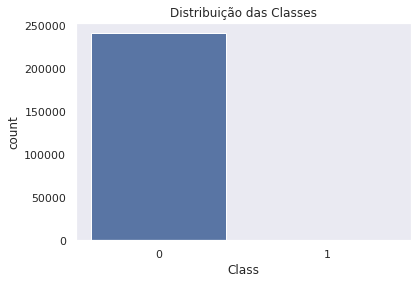

In [107]:
#Verificar o balanceamento das classes
print(df['Class'].value_counts())

print("\nFraudes representam {:.4f}% do dataset.\n".format((df[df['Class'] == 1].shape[0] / df.shape[0]) * 100))

#Plotar gráfico de barra para as classes
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes')
plt.plot()


A [descrição do Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) nos informa que as entradas referentes à todas as transações fraudulentas, são de <b>0.17%</b>.

O gráfico acima nos mostra a disparidade entre as operações. Isso é um problema, pois afeta o desempenho do modelo. Sendo assim, é necessário realizar um equilíbrio dos dados primeiro e logo em seguida, alimentar o modelo final de classificação. 

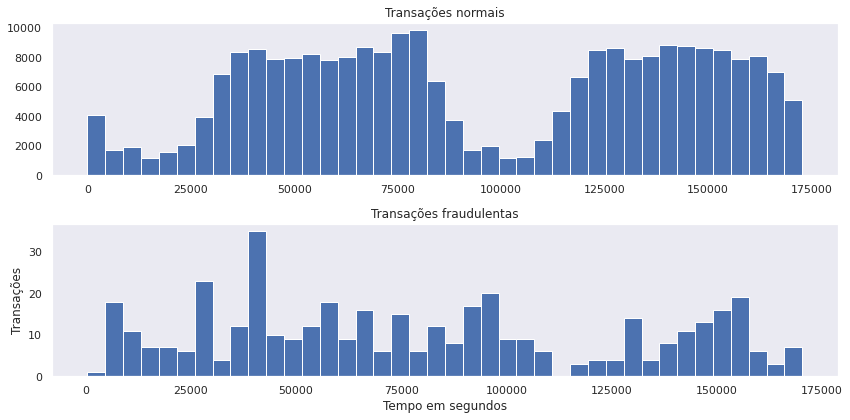

In [108]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

num = 40

ax[0].hist(df['Time'][df['Class'] == 0], bins=num)
ax[0].set_title('Transações normais')

ax[1].hist(df['Time'][df['Class'] == 1], bins=num)
ax[1].set_title('Transações fraudulentas')

plt.xlabel('Tempo em segundos')
plt.ylabel('Transações')

plt.tight_layout()

Os dois gráficos acima nos permite comparar as distribuicões das 2 classes no decorrer do tempo, ou seja, de acordo com a coluna `Time`. Entretanto, esses gráficos nada mostrou em relação à frequência.

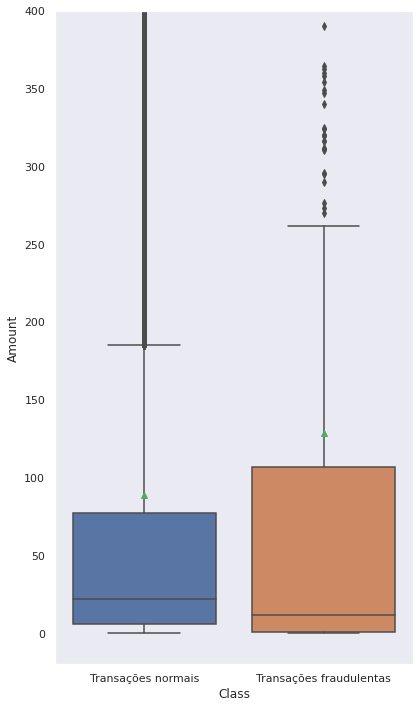

In [109]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(df['Class'], df['Amount'], showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Transações normais', 'Transações fraudulentas'])

plt.tight_layout()

O *Boxplot* acima nos mostra que existe uma distribuição diferente para as duas classes. Sendo assim, isso irá contribuir para o treinamento do modelo de <b><i>machine learning</i></b>.

In [110]:
#Fórmula estatística para mostrar que a média exata das operações fraudulentas
df[(df['Class'] == 1) & (df['Amount'] < 2000)]['Amount'].describe()

count     417.000000
mean      123.706859
std       249.477727
min         0.000000
25%         1.000000
50%        11.400000
75%       106.550000
max      1809.680000
Name: Amount, dtype: float64

Como a saída acima mostra, a média exata das operações fraudulentas é de <b>123.70</b> e a mediana é <b>11.40</b>.

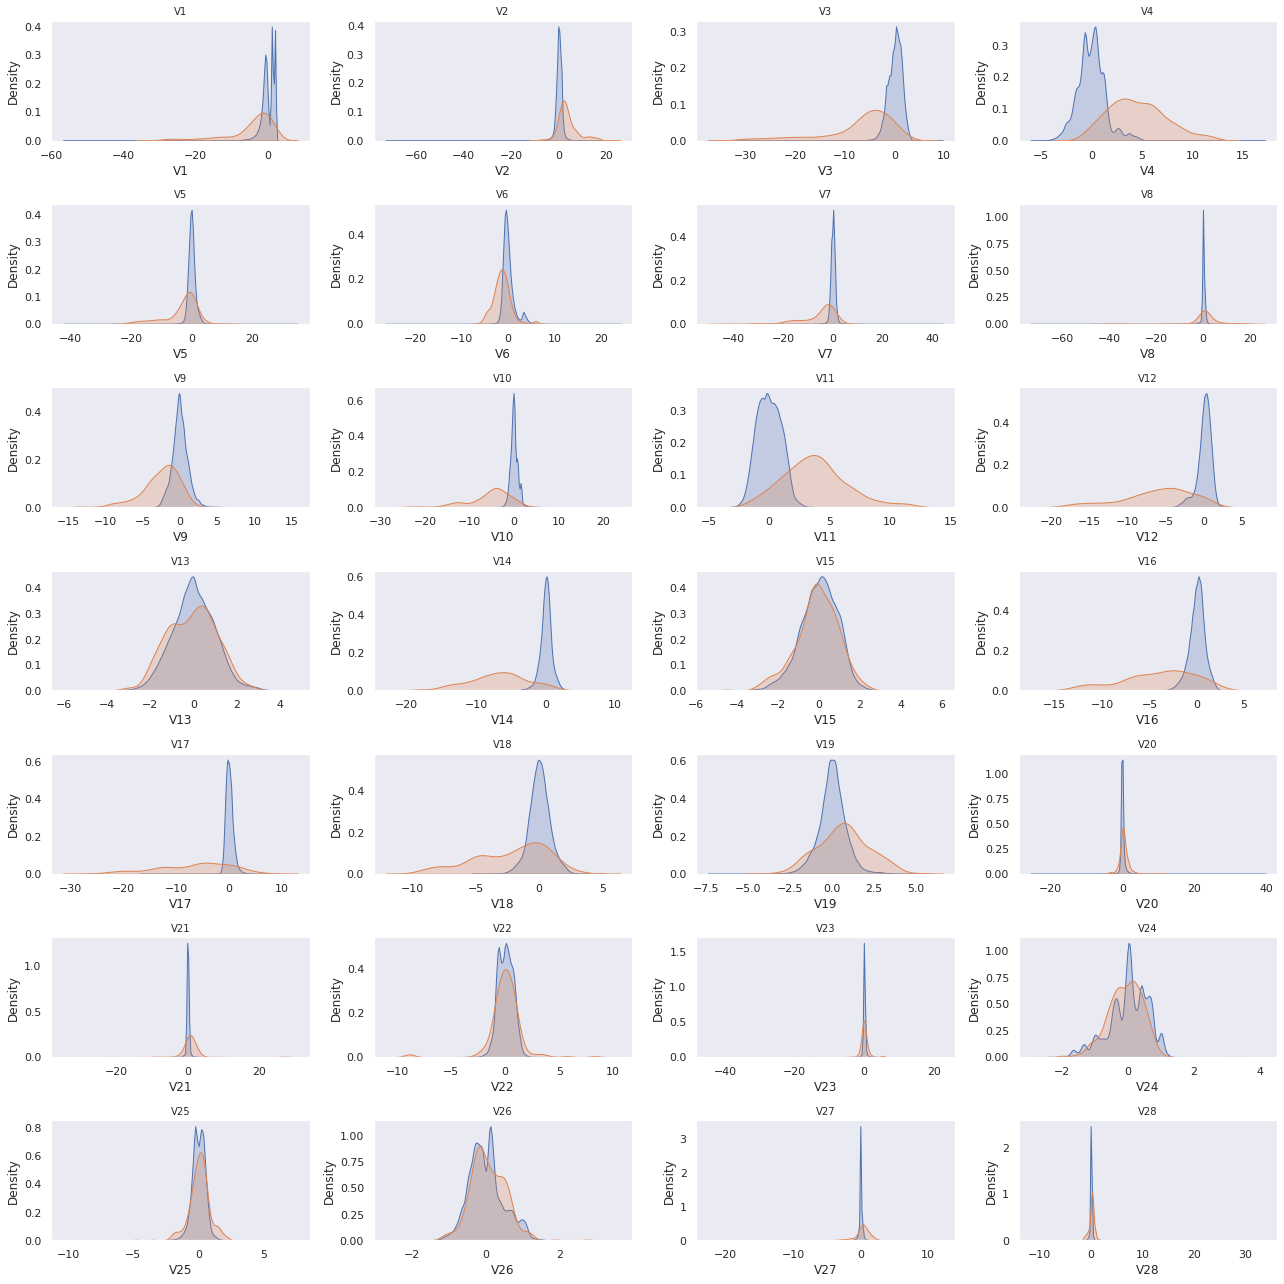

In [111]:

# 1. Criar um novo dataframe sem as colunas Class, Amount e Time
columns_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns

num_plots = len(columns_names)
df_class_0 = df[df['Class'] == 0]
df_class_1 = df[df['Class'] == 1]

# 2.Plotar o gráfico de densidade
fig, ax = plt.subplots(nrows=7, ncols= 4, figsize=(18, 18))

idx = 0
for col in columns_names:
  idx += 1
  plt.subplot(7, 4, idx)
  sns.kdeplot(df_class_0[col], label='Class 0', shade=True)
  sns.kdeplot(df_class_1[col], label='Class 1', shade=True)

  plt.title(col, fontsize=10)

plt.tight_layout()

O gráfico de densidade nos permite comprar as distribuições de cada variável para cada valor da classe, além de nos mostrar as mais importantes para detecção de anomalias.

Em algumas variáveis é possível perceber facilmente as fraudes, como por exemplo `V12`, `V14` e `V16`. Entretanto, em outras variáveis a distinção é mínima , em exemplo temos `V15`, `V25` e `V26`.

In [112]:
#Plotar a matriz de correlação

corr = df.corr()

corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.118457,-0.010616,-0.419641,-0.105103,0.175300,-0.064958,0.086161,-0.036932,-0.009838,...,0.045708,0.144001,0.050465,-0.015890,-0.232211,-0.041341,-0.005502,-0.009517,-0.010888,-0.012811
V1,0.118457,1.000000,-0.003221,-0.002048,0.001286,-0.002737,0.005445,0.007720,-0.000954,0.001276,...,-0.004866,0.001407,0.001084,0.002182,0.001429,0.002493,0.014357,-0.002697,-0.226873,-0.103091
V2,-0.010616,-0.003221,1.000000,-0.004338,0.000599,-0.007803,0.005961,0.003115,-0.003988,0.001673,...,-0.010503,0.002437,-0.000225,0.001347,0.002197,0.002980,0.013823,-0.000292,-0.535137,0.092597
V3,-0.419641,-0.002048,-0.004338,1.000000,0.001527,-0.005832,0.008002,0.011766,-0.001444,-0.000116,...,-0.005602,0.000467,0.000171,-0.000078,0.000581,0.001249,0.012716,-0.003521,-0.204736,-0.194432
V4,-0.105103,0.001286,0.000599,0.001527,1.000000,0.002608,-0.001654,-0.002743,0.001010,0.000404,...,0.003134,-0.001751,-0.000460,0.000518,-0.001973,-0.002080,-0.007137,0.002765,0.098261,0.132855
V5,0.175300,-0.002737,-0.007803,-0.005832,0.002608,1.000000,0.011409,0.027023,-0.003474,-0.001668,...,-0.008139,0.001810,0.000703,0.001788,0.002136,0.002251,0.017769,-0.007553,-0.370035,-0.099248
V6,-0.064958,0.005445,0.005961,0.008002,-0.001654,0.011409,1.000000,-0.017140,0.001701,-0.000275,...,0.003050,-0.000092,0.000057,-0.001212,-0.003953,-0.000941,-0.011568,0.004642,0.201013,-0.042852
V7,0.086161,0.007720,0.003115,0.011766,-0.002743,0.027023,-0.017140,1.000000,0.011662,0.002945,...,0.014209,-0.002891,0.001995,-0.002281,-0.002655,-0.001277,-0.020956,0.004633,0.378089,-0.191235
V8,-0.036932,-0.000954,-0.003988,-0.001444,0.001010,-0.003474,0.001701,0.011662,1.000000,0.002238,...,0.004262,-0.002544,-0.000851,0.000980,0.003707,0.000899,0.009590,-0.003871,-0.097466,0.019612
V9,-0.009838,0.001276,0.001673,-0.000116,0.000404,-0.001668,-0.000275,0.002945,0.002238,1.000000,...,-0.001278,0.000557,-0.001020,0.000143,0.000122,-0.000088,0.000763,-0.000136,-0.044716,-0.097159


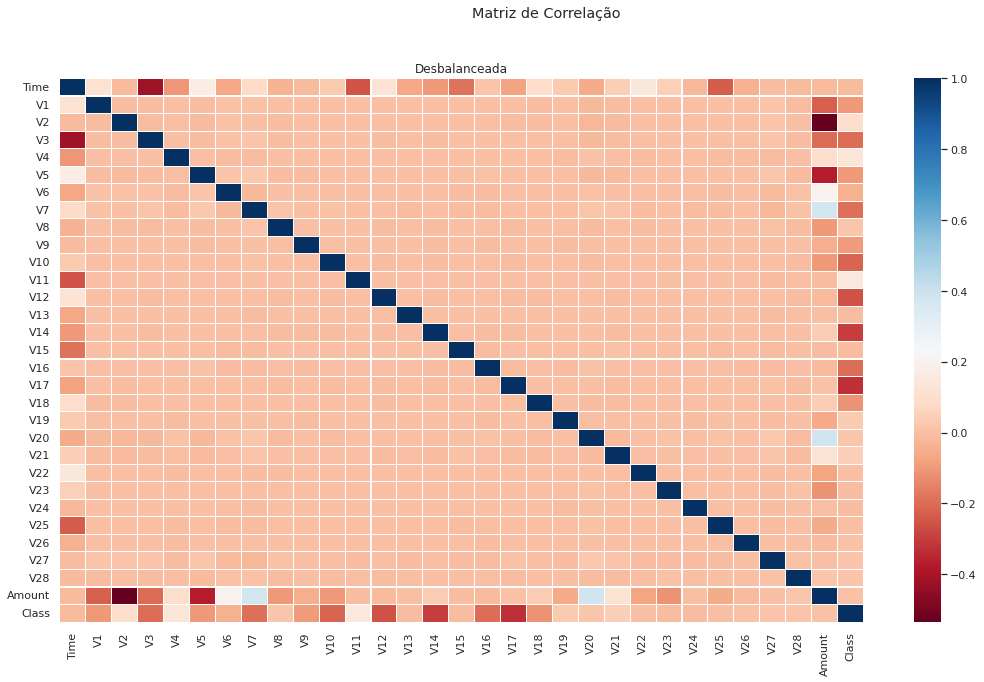

In [113]:
#Plotar o heatmap
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (18,10))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu", ax=ax)
ax.set_title('Desbalanceada')

plt.show()

Essa matriz de correlação não nos mostra nenhuma informação relevante, pois os dados estão desbalanceados. Após a normalização dos dados será plotado uma nova matriz de correlação.

<h3><b>Após a etapa exploratória , fica claro algumas informações:</b></h3>



*   O <i>dataset</i> necessita ser equilibrado, pois as transações fraudulentas representam apenas <b>0.17%</b> das entradas totais;
*   Não há valores ausentes ou nulos no <i>dataset</i> em comento;
*   As variáveis `Time` e `Amount` não estão ajustadas;
*   É possível perceber a padronização das <i>features</i> originais, pois o <b>PCA</b> é sensível à escala das variáveis.



# **Preparação dos dados**

Iremos aplicar 4 modelos de <i>machine learning: <b>Regressão Logística</b>, <b>KNN</b>, <b>SVM</b> e <b>Random Forest </i></b>. Entretanto, primeiramente precisamos preparar os dados, ous eja, realizar as seguintes etapas:



*   Padronizar as colunas `Time` e `Amount`, pois as mesmas estão em outra ordem de grandeza;
*   Dividir os dados em conjuntos de:
    *   Treino;
    *   Teste.
*   Balancear os dados com o objetivo de não prejudicar a performance das operações fraudulentas, ou seja, para a Classe 1.







In [114]:
# Padronização das colunas Time e Amount, pois a coluna Amount possui muito outliers.
df_clean = df.copy()

#Para esse fim, iremos utilizar a classe StandardScaler
std_scaler = StandardScaler()

df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))

df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


<b>Divisão dos conjuntos de Treino e Validação</b>

Para começar a balancear os dados, primeiramente precisamos dividir os dados existentes em **treino** e **validação**. Senão fizermos isso, não poderemos conferir se o balanceamento foi correto. 

A fim de assegurar que os dois conjuntos, **treino** e **validação**, tenham a mesma quantidade de classes, será utiulizado o parâmetro `stratify=y`.

In [115]:
# 1. Separar as variáveis entre X e y

# X é o DF sem o alvo, ou seja, a base interia com exceção da Class (target) 
X = df_clean.drop('Class', axis=1)

#y será a target, ou seja, o alvo.
y = df['Class']

# 2. Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

**Balancear os dados**

Existe uma biblioteca chamada `imblearn` que, de forma fácil, consegue balancear os dados. No projeto em comento, a técnica utilizada foi a `Under-sampling`, a mesma preserva a classe minoritária.

0    313
1    313
Name: Class, dtype: int64


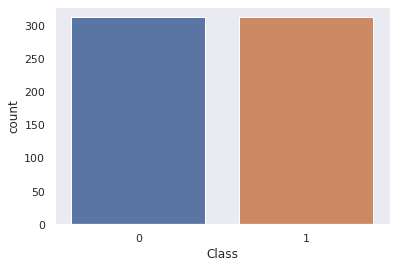

In [116]:
# 1. Técnica under-sampling

norm = RandomUnderSampler()

X_norm, y_norm = norm.fit_resample(X_train, y_train)

# 2. Mostrar o balanceamento das classes
print(pd.Series(y_norm).value_counts())

# 3. Plot da nova distribuição das Classes
sns.countplot(y_norm);
sns.set_theme(style="darkgrid")

É fácil perceber a diferença entre o primeiro plot, pois existia uma discrepância entre as barras do gráfico.

Após o balanceamento dos dados, podemos plotar a matriz de correlação.

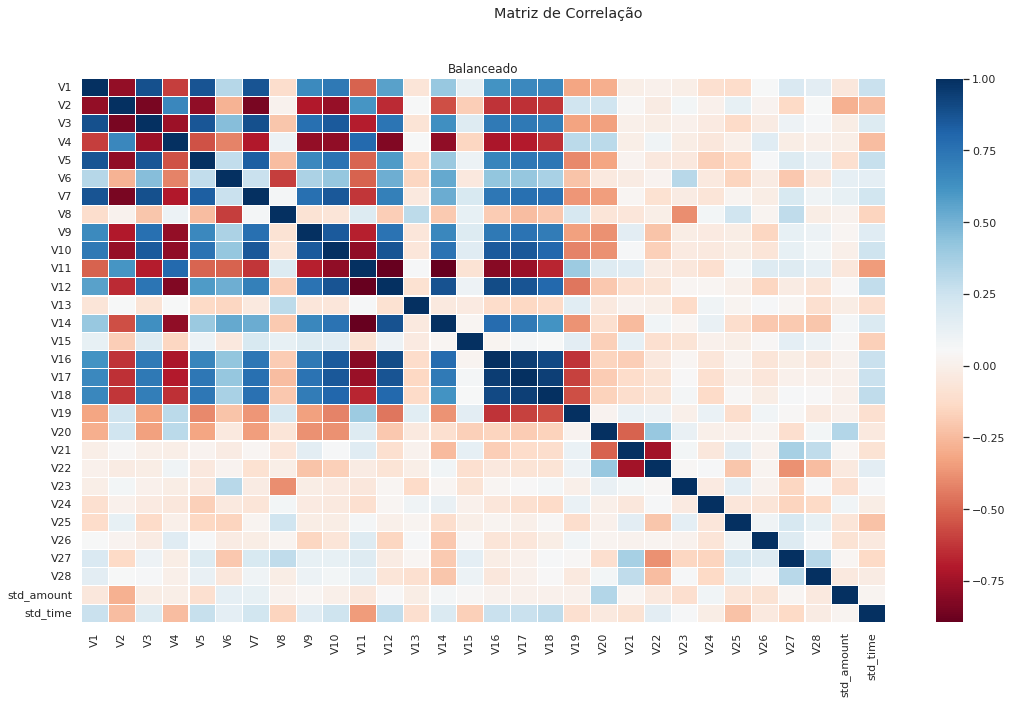

In [117]:
# 1. Criando o objeto de correlação 
corr = X_train.corr()
corr_norm = pd.DataFrame(X_norm).corr()

# 2. Plotar a matriz de correlação

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (18, 10))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr_norm, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap='RdBu', ax=ax)
ax.set_title('Balanceado')

plt.show()

Se fizermos a comparação com a correlação anterior, ou seja, com os dados não balanceados é possível notar que a nova matriz traz mais informações relevantes.

A fim de comparar as duas, vamos plotar uma ao lado da outra.

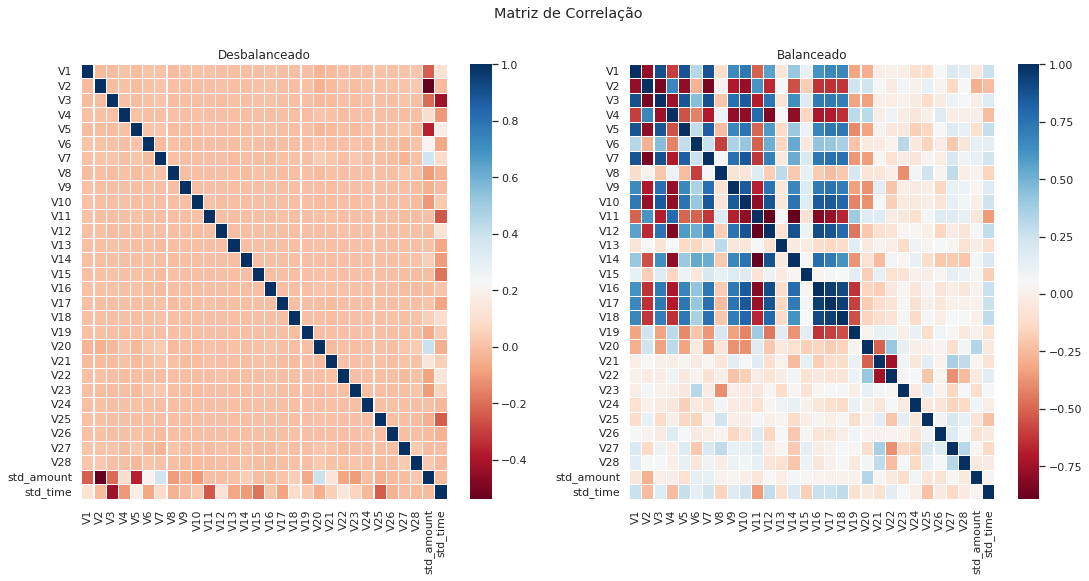

In [118]:
# Plotar as duas matrizes de correlação
corr = X_train.corr()
corr_norm = pd.DataFrame(X_norm).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_norm, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

# **Modelos de Machine Learning**

Nesse projeto foi decidido trabalhar com mais de um modelo, pois será possível avaliar o melhor modelo para o mesmo. Sendo assim, iremos mostrar um de cada vez e ao final será escolhido o que melhor se adapta ao dataset.

Os modelos são:


*   Regressão Logística
*   KNN
*   Random Forest
*   SVM




**Regressão Logística**

In [119]:
# 1. Criar o objeto de Regressão Logística

np.random.seed(2)
modelRL = LogisticRegression()

# 2. Treinar o modelo
modelRL.fit(X_norm, y_norm)

# 3. Realizar as previsões a partir dos dados de teste
yRL_pred = modelRL.predict(X_test)
yRL_proba = modelRL.predict_proba(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9713    0.9853     60417
           1     0.0504    0.8762    0.0952       105

    accuracy                         0.9711     60522
   macro avg     0.5251    0.9237    0.5403     60522
weighted avg     0.9981    0.9711    0.9838     60522

Regressão Logística - Número de erros: 1748

Acurácia: 0.9711

AUC: 0.9237

F1-Score é 0.09523809523809523 



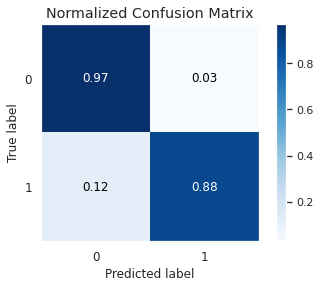

In [120]:
# 1. Plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, yRL_pred, normalize=True)

# 2. Imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, yRL_pred, digits=4))

# 3. Imprimindo a quantidade de erros
n_errorsRL = (yRL_pred != y_test).sum()
print('{}: {}'.format("Regressão Logística - Número de erros", n_errorsRL))

# 4. Imprimir a acurácia do modelo
print("\nAcurácia: {:.4f}\n".format(accuracy_score(y_test, yRL_pred)))

# 5. Imprimir a Área sob da curva (AUC)
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, yRL_pred)))

# 6. Imprimir F1-Score
print("F1-Score é {} \n".format(f1_score(y_test, yRL_pred)))

A plotagem da matriz de confusão desse modelo, nos mostra que:


*   A acurácia desse modelo é de **96%**
*   A área sobre a curva é de **93%**

*   O F1-Score é de **7%**



**KNN (K Nearest Neighbor)**

In [129]:
# 1. Importar o modelo KNN
from sklearn.neighbors import KNeighborsClassifier  

# 2. Definir o valor de visinhos
classifier = KNeighborsClassifier(n_neighbors=5)  

# 3. Treinar o modelo
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [122]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier()

In [123]:
#### Prever os valores de Y para os dados de teste (X_test)
yKNN_pred = classifier.predict(X_test)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60417
           1       0.96      0.70      0.81       105

    accuracy                           1.00     60522
   macro avg       0.98      0.85      0.91     60522
weighted avg       1.00      1.00      1.00     60522

KNN (K Nearest Neighbor) - Número de erros: 34

Acurácia do modelo:  0.9994382208122666

AUC: 0.8524

F1-Score é 0.8131868131868132 



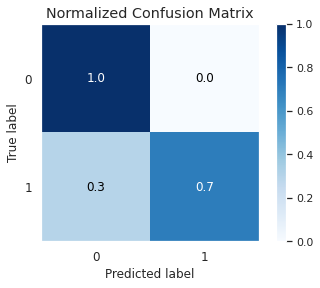

In [124]:
# Importando métricas para validação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

n_errorsKNN = (yKNN_pred != y_test).sum()



# 1. Plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, yKNN_pred, normalize=True)

# 2. Imprimir o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, yKNN_pred)) 

# 3. Imprimindo a quantidade de erros
print('{}: {}'.format("KNN (K Nearest Neighbor) - Número de erros", n_errorsKNN))

# 4. Imprimir o quão acurado foi o modelo
print('\nAcurácia do modelo: ' , accuracy_score(y_test, yKNN_pred))

# 5. Imprimir a Área sob da curva (AUC)
print("\nAUC: {:.4f}\n".format(roc_auc_score(y_test, yKNN_pred)))

# 6. Imprimir F1-Score
print("F1-Score é {} \n".format(f1_score(y_test, yKNN_pred)))

A plotagem da matriz de confusão desse modelo, nos mostra que:

*  A acurácia desse modelo é de **100%**

* A área sobre a curva é de **88%**

*   O F1-Score é de **85%**

**Random Forest**

In [125]:
# 1. Importar o modelo (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier

# 2. Criar o objeto do modelo
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# 3. Prever os valores de Y para os dados de teste (X_test)
yRF_pred = rfc.predict(X_test)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60417
           1       0.99      0.72      0.84       105

    accuracy                           1.00     60522
   macro avg       0.99      0.86      0.92     60522
weighted avg       1.00      1.00      1.00     60522

Random Forest - Número de erros: 30

Acurácia do modelo:  0.9995043124814117

AUC: 0.8619

F1-Score é 0.8351648351648352 



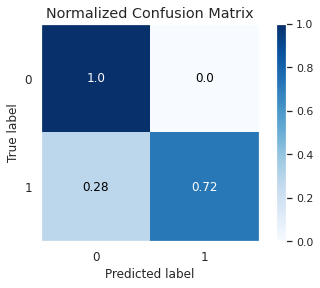

In [126]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef


n_errorsRF = (yRF_pred != y_test).sum()

# 1. Plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, yRF_pred, normalize=True)

# 2. Imprimir o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, yRF_pred))

# 3. Imprimindo a quantidade de erros
print('{}: {}'.format("Random Forest - Número de erros", n_errorsRF))

# 4. Imprimindo o quão acurado foi o modelo
print('\nAcurácia do modelo: ' , accuracy_score(y_test, yRF_pred))

# 5. Imprimir a Área sob da curva (AUC)
print("\nAUC: {:.4f}\n".format(roc_auc_score(y_test, yRF_pred)))

# 6. Imprimir F1-Score
print("F1-Score é {} \n".format(f1_score(y_test, yRF_pred)))

A plotagem da matriz de confusão desse modelo, nos mostra que:

*  A acurácia desse modelo é de **100%**

* A área sobre a curva é de **90%**

* O F1-Score é de **88%**

**SVM (Support Vector Machine)**

In [127]:
# 1. Importar o modelo SVM
from sklearn.svm import SVC

# 2. Criar o objeto
svc = SVC(kernel='rbf', C = 1, gamma='scale')  

# 3. Treinar o modelo
svc.fit(X_train, y_train) 

# 4. Prever os valores de Y para os dados de teste (X_test)
ySVC_pred = svc.predict(X_test)

Relatório de classificação: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60417
           1       1.00      0.63      0.77       105

    accuracy                           1.00     60522
   macro avg       1.00      0.81      0.89     60522
weighted avg       1.00      1.00      1.00     60522

SVM - Número de erros: 39

Acurácia do modelo:  0.9993556062258352

AUC: 0.8143

F1-Score é 0.7719298245614035 



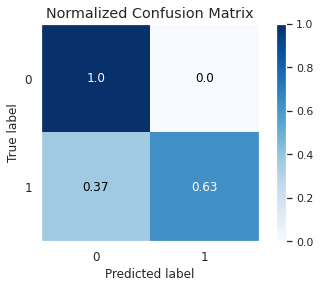

In [128]:
n_errorsSVC = (ySVC_pred != y_test).sum()

# 1. Plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, ySVC_pred, normalize=True)

# 2. Imprimir o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, ySVC_pred))

# 3. Imprimindo a quantidade de erros
print('{}: {}'.format("SVM - Número de erros", n_errorsSVC))

# 4. Imprimindo o quão acurado foi o modelo
print('\nAcurácia do modelo: ' , accuracy_score(y_test, ySVC_pred))

# 5. Imprimir a Área sob da curva (AUC)
print("\nAUC: {:.4f}\n".format(roc_auc_score(y_test, ySVC_pred)))

# 6. Imprimir F1-Score
print("F1-Score é {} \n".format(f1_score(y_test, ySVC_pred)))

A plotagem da matriz de confusão desse modelo, nos mostra que:

*  A acurácia desse modelo é de **100%**

* A área sobre a curva é de **81%**

* O F1-Score é de **77%**

# **Conclusão**

<p align="justify">
No projeto em comento foi aplicado diferentes métodos de <i>Machine Learning</i>, tais como <b>Regressão Logística</b>, <b>KNN</b>, <b>Random Forest</b> e <b>SVN</b>. A necessidade da aplicação desses quatro modelos é para verificar o que melhor se adapta ao cenário do projeto.<p>

<p align="justify">
Sendo assim, ao analisar as consequências da pontuação de precisão e da pontuação f1, descobriu-se que o <b>Random Forest</b> mostra que possui os melhores resultados em custo benefício. Enquanto a regressão logística acaba sendo uma novidade entre todas as quatro, no que diz respeito ao espaço de detecção de operações fraudulentas. </p>

<p align="justify">
Concluísse que, se esses métodos e cálculos de <i>Machine Learning</i> forem aplicados no sistema de identificação de transações fraudulentas de cartão de crédito em tempo real, a probabilidade de identificação desse tipo de transações pode ser antecipada pouco depois da efetivação da mesma. Essas técnicas de aprendizado de máquina podem ser adotadas para proteger os bancos de bandidos e diminuir os riscos.</p>

# **Referências**

**[1]** Suman, GJUS&T Hisar HCE, Sonepat, <b>“Survey Paper on Credit Card
Fraud Detection”</b>, International Journal of Advanced Re- search in Computer Engineering & Technology (IJARCET) Volume 3 Issue 3, March 2016. Pages 237–243.

**[2]** John Richard, D. Kho, Larry A. Vea, <b>“Credit Card Fraud Detection
Based on Transaction Behaviour”</b>, 2017 IEEE Region 10 Conference
(TENCON), Malaysia, November 5-8, 2017.

